In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import numpy as np
import plotly.graph_objects as go

# Parameters
dt = 100          # time step (s)
T = 3600 * 4      # total time (s)
N = int(T / dt)
lat = 45 * np.pi / 180
f = 2 * 7.2921e-5 * np.sin(lat)  # Coriolis parameter

# Initial conditions
u, v = 0, 10  # m/s
x, y = [0], [0]

for _ in range(N):
    du = f * v * dt
    dv = -f * u * dt
    u += du
    v += dv
    x.append(x[-1] + u * dt)
    y.append(y[-1] + v * dt)

# Plotly figure
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y, mode='lines', line=dict(color='red')))
fig.update_layout(title='2D Coriolis Effect – Northern Hemisphere',
                  xaxis_title='X Position (m)',
                  yaxis_title='Y Position (m)',
                  xaxis=dict(scaleanchor="y", scaleratio=1),
                  showlegend=False)
fig.show()


In [5]:
import numpy as np
import plotly.graph_objects as go

# Constants
R = 6.371e6
Omega = 7.2921e-5
dt = 60
T = 20 * 3600
N = int(T / dt)

# Initial position (equator)
theta = np.pi / 2
phi = 0
v = 200  # m/s northward

theta_list = [theta]
phi_list = [phi]

# Initial velocities
v_theta = -v / R
v_phi = 0

for _ in range(N):
    f = 2 * Omega * np.cos(theta)
    v_phi += (f * v * dt) / R
    theta += v_theta * dt
    phi += v_phi * dt
    theta_list.append(theta)
    phi_list.append(phi)

# Cartesian coordinates
x = R * np.sin(theta_list) * np.cos(phi_list)
y = R * np.sin(theta_list) * np.sin(phi_list)
z = R * np.cos(theta_list)

# Sphere (Earth) mesh
u, v = np.linspace(0, 2 * np.pi, 60), np.linspace(0, np.pi, 30)
u, v = np.meshgrid(u, v)
x_sphere = R * np.sin(v) * np.cos(u)
y_sphere = R * np.sin(v) * np.sin(u)
z_sphere = R * np.cos(v)

# Plotly figure
fig = go.Figure()

# Earth surface
fig.add_trace(go.Surface(x=x_sphere, y=y_sphere, z=z_sphere,
                         colorscale='Blues', showscale=False, opacity=0.5))

# Trajectory
fig.add_trace(go.Scatter3d(x=x, y=y, z=z, mode='lines',
                           line=dict(color='red', width=6),
                           name='Trajectory'))

fig.update_layout(scene=dict(aspectmode='data'),
                  title='Coriolis Effect on a Rotating Sphere',
                  showlegend=False)

fig.show()


In [6]:
import plotly.figure_factory as ff
import numpy as np

# Grid setup
x, y = np.meshgrid(np.linspace(-1, 1, 20), np.linspace(-1, 1, 20))
p = -x  # linear pressure field (decreasing in x)

# Pressure gradient
dpdx = np.gradient(p, axis=1)
dpdy = np.gradient(p, axis=0)

# Constants
rho = 1.225
f = 1e-4

# Geostrophic wind: perpendicular to gradient
u = -1 / (rho * f) * dpdy
v =  1 / (rho * f) * dpdx

# Normalize for quiver plotting
mag_p = np.sqrt(dpdx**2 + dpdy**2)
mag_g = np.sqrt(u**2 + v**2)

# Avoid division by zero
mag_p[mag_p == 0] = 1
mag_g[mag_g == 0] = 1

# Normalized vectors (unit length arrows)
dpdx_n = dpdx / mag_p
dpdy_n = dpdy / mag_p
u_n = u / mag_g
v_n = v / mag_g

# Create two quiver plots: pressure gradient (blue), geostrophic wind (red)
fig = ff.create_quiver(x, y, dpdx_n, dpdy_n, scale=0.1,
                       arrow_scale=0.2, line=dict(color='blue'),
                       name='Pressure Gradient')
fig2 = ff.create_quiver(x, y, u_n, v_n, scale=0.1,
                        arrow_scale=0.2, line=dict(color='red'),
                        name='Geostrophic Wind')

# Merge the traces
fig.add_traces(fig2.data)
fig.update_layout(title="Geostrophic Balance: Red = Wind, Blue = Pressure Gradient", height=600,)
fig.show()


In [7]:
import plotly.figure_factory as ff
import numpy as np

# Grid
x, y = np.meshgrid(np.linspace(-1, 1, 20), np.linspace(-1, 1, 20))
p = -x  # pressure decreases left to right

# Pressure gradient (pointing from high to low)
dpdx = np.gradient(p, axis=1)
dpdy = np.gradient(p, axis=0)

# Wind now moves directly down gradient (like gravity pulling it)
u = -dpdx
v = -dpdy

# Normalize for plotting
mag = np.sqrt(u**2 + v**2)
mag[mag == 0] = 1  # avoid division by zero
u_n = u / mag
v_n = v / mag

# Plot
fig = ff.create_quiver(x, y, u_n, v_n, scale=0.2,
                       arrow_scale=0.4, line=dict(color='green'),
                       name='Wind (No Coriolis)')
fig.update_layout(title="Wind Without Coriolis Force (Follows Pressure Gradient)")
fig.show()


In [25]:
import numpy as np
import plotly.graph_objects as go

# Constants
R = 6.371e6
Omega = 7.2921e-5
dt = 60
T = 20 * 3600
N = int(T / dt)

# Start near equator
theta = np.pi / 2  # colatitude
phi = 0
v_r = 200  # m/s northward

# Initialize arrays
theta_list = [theta]
phi_list = [phi]

# Velocity components (theta = north-south, phi = east-west)
v_theta = -v_r / R
v_phi = 0

for _ in range(N):
    # Local Coriolis effect
    f = 2 * Omega * np.cos(theta)
    v_phi += f * v_r * dt / R  # apply Coriolis deflection
    
    theta += v_theta * dt
    phi += v_phi * dt

    theta_list.append(theta)
    phi_list.append(phi)

# Convert to Cartesian coordinates
x = R * np.sin(theta_list) * np.cos(phi_list)
y = R * np.sin(theta_list) * np.sin(phi_list)
z = R * np.cos(theta_list)

# Earth mesh
u, v = np.linspace(0, 2*np.pi, 60), np.linspace(0, np.pi, 30)
u, v = np.meshgrid(u, v)
x_s = R * np.sin(v) * np.cos(u)
y_s = R * np.sin(v) * np.sin(u)
z_s = R * np.cos(v)

# Plot
fig = go.Figure()

# Earth surface
fig.add_trace(go.Surface(x=x_s, y=y_s, z=z_s,
                         colorscale='Blues', showscale=False, opacity=0.5))

# Trajectory with Coriolis
fig.add_trace(go.Scatter3d(x=x, y=y, z=z,
                           mode='lines',
                           line=dict(color='red', width=5),
                           name='With Coriolis'))

fig.update_layout(scene=dict(aspectmode='data'),
                  title='Air Parcel Motion With Coriolis (Curving Eastward)')
fig.show()


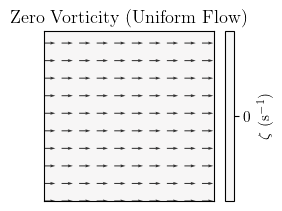

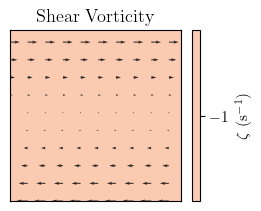

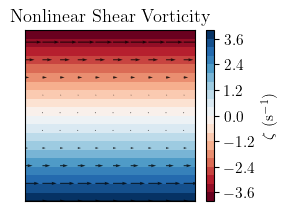

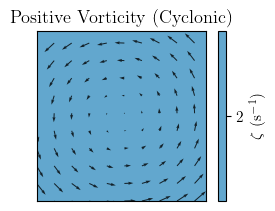

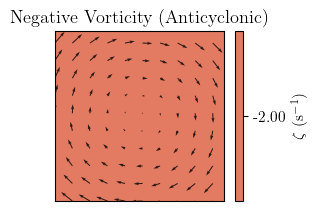

In [161]:
import numpy as np
import matplotlib
matplotlib.use("pgf")
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,  # optionally True if you want LaTeX labels
    "font.family": "serif",
    "font.size": 11,
})

from matplotlib.colors import TwoSlopeNorm
%matplotlib inline
# Grid
x, y = np.meshgrid(np.linspace(-2, 2, 30), np.linspace(-2, 2, 30))

# Define different wind fields
fields = {
    'Zero Vorticity (Uniform Flow)': (np.full_like(x, 2), np.zeros_like(x)),
    'Shear Vorticity': (y, np.zeros_like(x)),
    # 'Curvature Vorticity (Non-divergent)': (
    #     -y / (x**2 + y**2 + 0.1),
    #      x / (x**2 + y**2 + 0.1)
    # ),
    'Nonlinear Shear Vorticity': (y**2, np.zeros_like(x)),
    'Positive Vorticity (Cyclonic)': (-y, x),
    'Negative Vorticity (Anticyclonic)': (y, -x)
}

zeta_all = []

# First pass: calculate all zeta values to determine global limits
for (u, v) in fields.values():
    dx = x[0,1] - x[0,0]
    dy = y[1,0] - y[0,0]
    dvdx = np.gradient(v, axis=1) / dx
    dudy = np.gradient(u, axis=0) / dy
    zeta = dvdx - dudy
    zeta = np.round(zeta, 2)
    zeta_all.append(zeta)

# Global vorticity range
zeta_stack = np.stack(zeta_all)
vmax = np.max(np.abs(zeta_stack))
norm = TwoSlopeNorm(vmin=-vmax, vcenter=0, vmax=vmax)

# Plot
i = 0
for (title, (u, v)), zeta in zip(fields.items(), zeta_all):
    fig, ax = plt.subplots(1, 1, figsize = (3,2) ,constrained_layout=True)
    c = ax.contourf(x, y, zeta, cmap='RdBu', levels=20, norm=norm)
    step = 3  # or 3
    quiver = ax.quiver(x[::step, ::step], y[::step, ::step],
                    u[::step, ::step], v[::step, ::step],
                    scale=30, color='black', alpha=0.8)    # ax.streamplot(x, y, u, v, color='k', density=0.3)
    ax.set_title(title)
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    if np.all(zeta == zeta[0,0]):
        # c = ax.contourf(x, y, zeta, cmap='RdBu', levels=[zeta[0,0]-1e-6, zeta[0,0]+1e-6], vmin=zeta[0,0], vmax=zeta[0,0])
        cb = fig.colorbar(c, ax=ax, location='right', shrink=1)
        cb.set_ticks([zeta[0,0]])
        cb.set_ticklabels([f'{zeta[0,0]:.2f}'])
        cb.set_label(r'$\zeta$ (s$^{-1}$)')
    else:
        cb = fig.colorbar(c, ax=ax, location='right', label=r'$\zeta$ (s$^{-1}$)', shrink=1)
    # plt.show()
    fig.savefig(f"../images/vorticity_plot{i}.pdf")
    i = i + 1


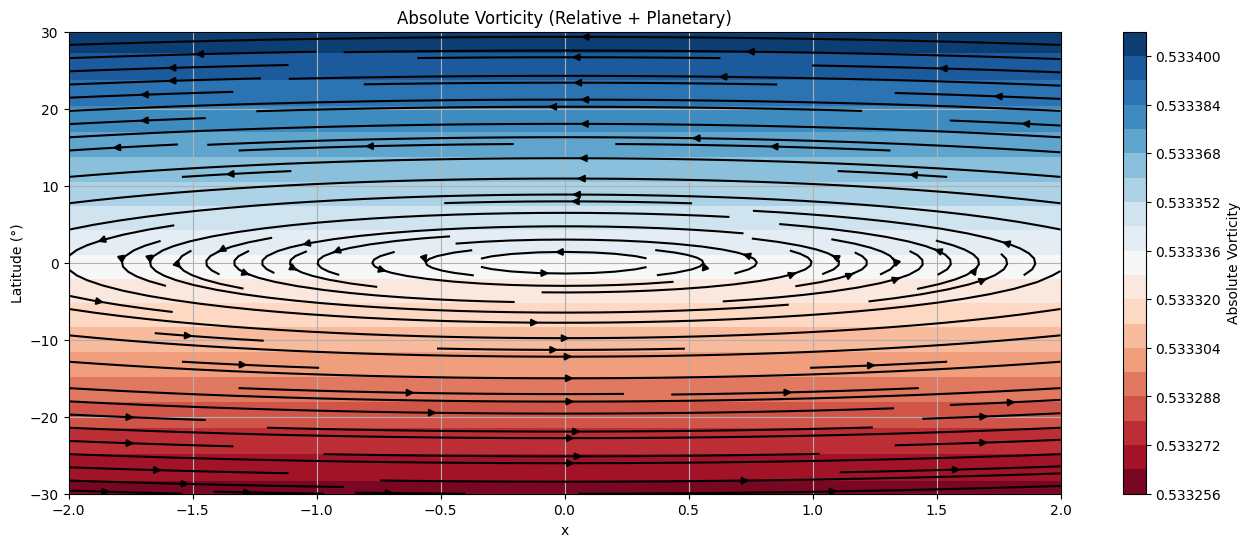

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Grid (let y-axis represent latitude from -30° to 30°)
x, y = np.meshgrid(np.linspace(-2, 2, 30), np.linspace(-30, 30, 30))  # y in degrees
phi = np.deg2rad(y)  # latitude in radians

# Wind field: circular pattern
u = -y / 30  # normalize so units match approx
v = x / 2

# Relative vorticity (∂v/∂x - ∂u/∂y)
dvdx = np.gradient(v, axis=1) / (x[0, 1] - x[0, 0])
dudy = np.gradient(u, axis=0) / (y[1, 0] - y[0, 0])
zeta = dvdx - dudy

# Planetary vorticity f
Omega = 7.2921e-5  # rad/s
f = 2 * Omega * np.sin(phi)

# Absolute vorticity
zeta_abs = zeta + f

# Plot
fig, ax = plt.subplots(figsize=(16, 6))
strm = ax.streamplot(x, y, u, v, color='k', density=1.2)
c = ax.contourf(x, y, zeta_abs, cmap='RdBu', levels=20)
plt.colorbar(c, ax=ax, label='Absolute Vorticity')
ax.set_title('Absolute Vorticity (Relative + Planetary)')
ax.set_xlabel('x')
ax.set_ylabel('Latitude (°)')
# ax.set_aspect('equal')
plt.grid(True)
plt.show()


/tmp/ipykernel_157835/923401042.py:50: UserWarning:

frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.



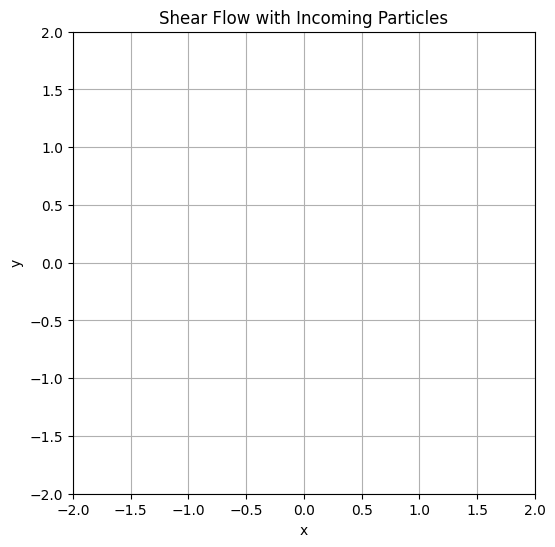

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Flow and domain
xlim, ylim = [-2, 2], [-2, 2]
u_func = lambda y: y**2

# Initialize empty particle list
particles = []

# Plot setup
fig, ax = plt.subplots(figsize=(6, 6))
scat = ax.scatter([], [], s=10)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('Shear Flow with Incoming Particles')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_aspect('equal')
plt.grid(True)

def update(frame):
    global particles
    dt = 0.05

    # Add new particles on the right
    new_y = np.random.uniform(ylim[0], ylim[1], size=5)
    new_x = np.full_like(new_y, xlim[1])
    new_particles = np.stack((new_x, new_y), axis=-1)
    particles = particles + [*new_particles]

    # Update particle positions
    particles_arr = np.array(particles)
    u = u_func(particles_arr[:, 1])
    particles_arr[:, 0] -= u * dt  # move left
    particles = particles_arr.tolist()

    # Remove particles that leave the left side
    particles = [p for p in particles if p[0] > xlim[0]]

    # Update plot
    if particles:
        scat.set_offsets(np.array(particles))
    else:
        scat.set_offsets(np.empty((0, 2)))

    return scat,

ani = FuncAnimation(fig, update, interval=50)
plt.show()


/tmp/ipykernel_157835/1371604424.py:62: UserWarning:

frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.

/home/nunigan/miniconda3/envs/rossby/lib/python3.11/site-packages/matplotlib/animation.py:908: UserWarning:

Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.



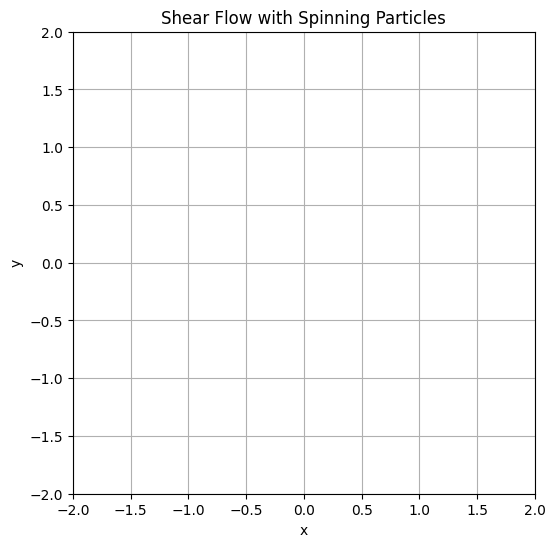

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import RegularPolygon

# Flow and domain
xlim, ylim = [-2, 2], [-2, 2]
u_func = lambda y: y**2
zeta_func = lambda y: -2 * y  # vorticity = -2y, spin rate ~ zeta/2

particles = []

# Setup plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('Shear Flow with Spinning Particles')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_aspect('equal')
plt.grid(True)

# Initialize patch list
patches = []

def update(frame):
    global particles, patches
    dt = 0.05

    # Remove old patches from plot
    for patch in patches:
        patch.remove()
    patches = []

    # Add new particles on the right
    new_y = np.random.uniform(ylim[0], ylim[1], size=5)
    new_x = np.full_like(new_y, xlim[1])
    new_theta = np.zeros_like(new_y)
    new_particles = list(zip(new_x, new_y, new_theta))
    particles.extend(new_particles)

    # Update particle positions and spin
    updated_particles = []
    for x, y, theta in particles:
        u = u_func(y)
        zeta = zeta_func(y)
        x_new = x - u * dt
        theta_new = theta + 0.5 * zeta * dt  # spin rate = zeta/2
        updated_particles.append((x_new, y, theta_new))

    # Remove particles that exit
    particles = [p for p in updated_particles if p[0] > xlim[0]]

    # Draw each particle as a rotated triangle
    for x, y, theta in particles:
        triangle = RegularPolygon((x, y), numVertices=3, radius=0.05, orientation=theta, color='blue')
        ax.add_patch(triangle)
        patches.append(triangle)

    return patches

ani = FuncAnimation(fig, update, interval=50)
plt.show()


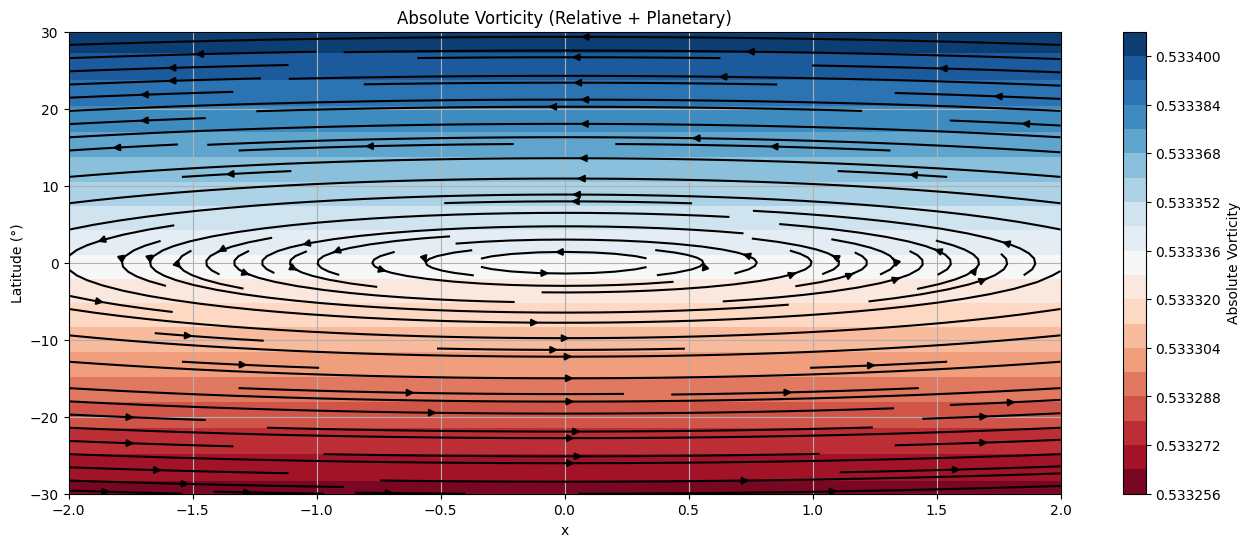

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Setup
lat = np.linspace(-30, 60, 500)  # degrees
phi = np.deg2rad(lat)            # radians
Omega = 7.2921e-5                # Earth's rotation rate
f = 2 * Omega * np.sin(phi)      # Coriolis parameter

# Assume absolute vorticity is conserved
zeta_abs_initial = f[0] + 5e-5  # initial total vorticity (arbitrary)

# Compute relative vorticity needed to conserve ζ + f
zeta = zeta_abs_initial - f

# Plot
plt.figure(figsize=(8, 5))
plt.plot(lat, f, label='Planetary Vorticity f(φ)', color='blue')
plt.plot(lat, zeta, label='Relative Vorticity ζ(φ)', color='red')
plt.plot(lat, zeta + f, '--', label='Absolute Vorticity ζ + f', color='black')

plt.title('Conservation of Absolute Vorticity Along Flow Line')
plt.xlabel('Latitude (°)')
plt.ylabel('Vorticity (1/s)')
plt.grid(True)
plt.legend()
plt.show()


qt.qpa.wayland: Wayland does not support QWindow::requestActivate()


In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
Omega = 7.2921e-5           # Earth's rotation rate (rad/s)
phi = np.deg2rad(np.linspace(-30, 60, 500))  # Latitude range (in radians)
H = 10000                   # Assume constant column height (m)
f = 2 * Omega * np.sin(phi) # Planetary vorticity

# Assume initial values at φ0 = 0°
phi0 = 0
f0 = 2 * Omega * np.sin(phi0)
zeta0 = 5e-5                # Arbitrary initial relative vorticity

# Compute conserved PV
PV = (zeta0 + f0) / H

# Compute relative vorticity required to conserve PV
zeta = PV * H - f

# Plot
plt.figure(figsize=(8, 5))
plt.plot(np.rad2deg(phi), zeta, label='Relative Vorticity $\\zeta(\\phi)$')
plt.plot(np.rad2deg(phi), f, label='Planetary Vorticity $f(\\phi)$', linestyle='--')
plt.plot(np.rad2deg(phi), zeta + f, label='Absolute Vorticity $\\zeta + f$', linestyle=':')
plt.axvline(0, color='gray', linestyle=':')
plt.xlabel('Latitude (°)')
plt.ylabel('Vorticity (1/s)')
plt.title('Conservation of Potential Vorticity Along Meridional Path')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


qt.qpa.wayland: Wayland does not support QWindow::requestActivate()


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Constants
Omega = 7.2921e-5
H = 10000  # m, constant thickness

# Latitude array
phi = np.deg2rad(np.linspace(-30, 60, 500))  # rad
lat_deg = np.rad2deg(phi)
f = 2 * Omega * np.sin(phi)

# Initial conditions at equator
phi0 = 0
f0 = 2 * Omega * np.sin(phi0)
zeta0 = 5e-5
PV = (zeta0 + f0) / H
zeta = PV * H - f
zeta_abs = zeta + f

# Animation
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_xlim(-30, 60)
ax.set_ylim(min(zeta.min(), f.min())*1.2, max(zeta0 + f0, f.max())*1.2)
ax.set_xlabel("Latitude (°)")
ax.set_ylabel("Vorticity (1/s)")
ax.set_title("Conservation of Potential Vorticity: Moving Air Parcel")

line_zeta, = ax.plot(lat_deg, zeta, label="Relative Vorticity $\\zeta(\\phi)$", color="red")
line_f, = ax.plot(lat_deg, f, label="Planetary Vorticity $f(\\phi)$", color="blue", linestyle="--")
line_abs, = ax.plot(lat_deg, zeta_abs, label="Absolute Vorticity $\\zeta + f$", color="black", linestyle=":")
point, = ax.plot([], [], 'ko', markersize=8, label="Moving Parcel")

ax.legend()
ax.grid(True)

def update(frame):
    lat = lat_deg[frame]
    point.set_data([lat], [zeta[frame]])
    return point,

ani = animation.FuncAnimation(fig, update, frames=len(lat_deg), interval=30, blit=True)
plt.show()


qt.qpa.wayland: Wayland does not support QWindow::requestActivate()


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Constants
Omega = 7.2921e-5
H = 10000  # constant column depth
zeta0 = 5e-5
phi0 = 0  # starting latitude in radians
f0 = 2 * Omega * np.sin(phi0)
PV = (zeta0 + f0) / H

# Simulate parcel motion northward (e.g. 500 steps from -30° to 60°)
n_steps = 200
phi = np.linspace(np.deg2rad(-30), np.deg2rad(60), n_steps)
lat_deg = np.rad2deg(phi)
f = 2 * Omega * np.sin(phi)
zeta = PV * H - f
zeta_abs = zeta + f

# Initialize plots
fig, (ax_map, ax_vorticity) = plt.subplots(1, 2, figsize=(12, 5))

# --- Left: Parcel moving on latitude map
ax_map.set_xlim(-1, 1)
ax_map.set_ylim(-30, 60)
ax_map.set_title("Air Parcel Moving Northward")
ax_map.set_ylabel("Latitude (°)")
ax_map.set_xticks([])
parcel_dot, = ax_map.plot(0, lat_deg[0], 'ro', markersize=10)

# --- Right: Vorticity evolution
ax_vorticity.set_xlim(0, n_steps)
ax_vorticity.set_ylim(min(zeta.min(), f.min())*1.2, max(zeta0 + f0, f.max())*1.2)
ax_vorticity.set_title("Vorticity Over Time")
ax_vorticity.set_xlabel("Time Step")
ax_vorticity.set_ylabel("Vorticity (1/s)")
line_zeta, = ax_vorticity.plot([], [], label="Relative Vorticity $\\zeta$", color="red")
line_f, = ax_vorticity.plot([], [], label="Planetary Vorticity $f$", color="blue")
line_abs, = ax_vorticity.plot([], [], label="Absolute Vorticity $\\zeta + f$", color="black", linestyle="--")
ax_vorticity.legend()
ax_vorticity.grid(True)

# Storage for time series
zeta_history, f_history, abs_history = [], [], []

# --- Animation update
def update(frame):
    # Update position on map
    parcel_dot.set_data(0, lat_deg[frame])

    # Update time series
    zeta_history.append(zeta[frame])
    f_history.append(f[frame])
    abs_history.append(zeta[frame] + f[frame])

    line_zeta.set_data(range(len(zeta_history)), zeta_history)
    line_f.set_data(range(len(f_history)), f_history)
    line_abs.set_data(range(len(abs_history)), abs_history)

    return parcel_dot, line_zeta, line_f, line_abs

ani = animation.FuncAnimation(fig, update, frames=n_steps, interval=50, blit=True)
plt.tight_layout()
plt.show()


RuntimeError: x must be a sequence

Traceback (most recent call last):
  File "/home/nunigan/miniconda3/envs/rossby/lib/python3.11/site-packages/matplotlib/cbook.py", line 361, in process
    func(*args, **kwargs)
  File "/home/nunigan/miniconda3/envs/rossby/lib/python3.11/site-packages/matplotlib/animation.py", line 928, in _start
    self._init_draw()
  File "/home/nunigan/miniconda3/envs/rossby/lib/python3.11/site-packages/matplotlib/animation.py", line 1770, in _init_draw
    self._draw_frame(frame_data)
  File "/home/nunigan/miniconda3/envs/rossby/lib/python3.11/site-packages/matplotlib/animation.py", line 1789, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
                          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/tmp/ipykernel_157835/3006996855.py", line 50, in update
    parcel_dot.set_data(0, lat_deg[frame])
  File "/home/nunigan/miniconda3/envs/rossby/lib/python3.11/site-packages/matplotlib/lines.py", line 666, in set_data
    self.set_xdata(x)
  File "/home/nunigan/mini

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
Omega = 7.2921e-5  # Earth's rotation rate (rad/s)
a = 6.371e6        # Earth radius (m)

# Latitude range around a reference latitude (e.g., 45°)
phi0_deg = 45
phi0 = np.deg2rad(phi0_deg)

# y = distance north/south from φ₀ (meters)
dy = np.linspace(-2e6, 2e6, 500)  # +/- 2000 km
phi = phi0 + dy / a              # convert to latitude in radians

# True Coriolis parameter
f_true = 2 * Omega * np.sin(phi)

# Beta-plane approximation
f0 = 2 * Omega * np.sin(phi0)
beta = 2 * Omega * np.cos(phi0) / a
f_beta = f0 + beta * dy

# Plot
plt.figure(figsize=(8, 5))
plt.plot(dy / 1000, f_true, label='True $f(\\phi)$', linewidth=2)
plt.plot(dy / 1000, f_beta, '--', label='Beta-Plane Approximation', linewidth=2)
plt.axvline(0, color='gray', linestyle=':', label=f'Latitude = {phi0_deg}°')
plt.xlabel('Distance from Reference Latitude (km)')
plt.ylabel('Coriolis Parameter $f$ (1/s)')
plt.title('Beta-Plane Approximation vs True Coriolis Parameter')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


qt.qpa.wayland: Wayland does not support QWindow::requestActivate()


In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
u = 10  # m/s background flow
beta = 2e-11  # 1/m/s
l = 0  # purely zonal wave (no meridional structure)

# Wavenumbers
k = np.linspace(1e-7, 5e-6, 500)  # 1/m
omega = u * k - beta * k / (k**2 + l**2)
c = omega / k  # phase speed

# Plot
plt.figure(figsize=(8, 5))
plt.plot(1/k / 1000, c, label='Phase Speed (c = ω/k)')
plt.axhline(u, color='gray', linestyle='--', label='Background Flow (u)')
plt.axhline(0, color='black', linestyle=':')
plt.xlabel('Wavelength (km)')
plt.ylabel('Phase Speed (m/s)')
plt.title('Rossby Wave Phase Speed vs Wavelength')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


qt.qpa.wayland: Wayland does not support QWindow::requestActivate()


In [21]:
%matplotlib qt

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Wave parameters
u = 10         # m/s (mean flow)
beta = 2e-11   # 1/m/s
k = 2 * np.pi / (3e6)  # zonal wavenumber (2π / 3000 km)
l = 0          # purely zonal
A = 1          # amplitude

# Dispersion relation
omega = u * k - beta * k / (k**2 + l**2)

# Spatial and temporal domain
x = np.linspace(0, 6e6, 500)  # 0 to 6000 km
t = np.linspace(0, 2*24*3600, 200)  # 2 days in seconds

# Create figure
fig, ax = plt.subplots(figsize=(8, 4))
line, = ax.plot(x / 1000, A * np.cos(k * x), color='royalblue')
ax.set_ylim(-1.5, 1.5)
ax.set_xlim(0, 6000)
ax.set_xlabel('Distance (km)')
ax.set_ylabel('Streamfunction ψ')
ax.set_title('Rossby Wave Animation (1D)')

# Animation function
def update(frame):
    psi = A * np.cos(k * x - omega * t[frame])
    line.set_ydata(psi)
    return line,

ani = animation.FuncAnimation(fig, update, frames=len(t), interval=50, blit=True)

plt.show()


qt.qpa.wayland: Wayland does not support QWindow::requestActivate()


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parameters
A = 1
u0 = 10             # mean flow speed
beta = 2e-11        # 1/m/s
k = 2 * np.pi / 3e6 # zonal wavenumber (3000 km wavelength)
l = 2 * np.pi / 1.5e6 # meridional wavenumber (1500 km wavelength)
omega = u0 * k - beta * k / (k**2 + l**2)

# Spatial grid
x = np.linspace(0, 6e6, 30)
y = np.linspace(0, 3e6, 15)
xg, yg = np.meshgrid(x, y)

# Time
t = np.linspace(0, 2*24*3600, 100)  # 2 days

# Set up plot
fig, ax = plt.subplots(figsize=(8, 5))
quiv = ax.quiver(xg / 1000, yg / 1000, np.zeros_like(xg), np.zeros_like(yg))
ax.set_title("2D Rossby Wave – Wind Field Animation")
ax.set_xlabel("x (km)")
ax.set_ylabel("y (km)")
ax.set_xlim(0, 6000)
ax.set_ylim(0, 3000)

# Animation update function
def update(frame):
    psi = A * np.cos(k * xg + l * yg - omega * t[frame])
    u = -np.gradient(psi, axis=0) / (y[1] - y[0])  # -dψ/dy
    v = np.gradient(psi, axis=1) / (x[1] - x[0])   # dψ/dx
    ax.clear()
    ax.set_title("2D Rossby Wave – Wind Field")
    ax.set_xlabel("x (km)")
    ax.set_ylabel("y (km)")
    ax.set_xlim(0, 6000)
    ax.set_ylim(0, 3000)
    ax.quiver(xg / 1000, yg / 1000, u, v, scale=100)
    return ax,

ani = animation.FuncAnimation(fig, update, frames=len(t), interval=100)
plt.show()


qt.qpa.wayland: Wayland does not support QWindow::requestActivate()


/home/nunigan/miniconda3/envs/rossby/lib/python3.11/site-packages/matplotlib/quiver.py:695: RuntimeWarning:

divide by zero encountered in scalar divide

/home/nunigan/miniconda3/envs/rossby/lib/python3.11/site-packages/matplotlib/quiver.py:695: RuntimeWarning:

invalid value encountered in multiply



In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Constants
Omega = 7.2921e-5         # Earth's rotation rate (rad/s)
a = 6.371e6               # Earth radius (m)
A = 1e6                   # Streamfunction amplitude (adjusted for visibility)

# Grid
lon = np.linspace(0, 360, 60)
lat = np.linspace(-60, 60, 30)
lon2d, lat2d = np.meshgrid(np.deg2rad(lon), np.deg2rad(lat))  # in radians

# Wavenumbers
k = 4  # zonal
n = 2  # meridional
T = 2 * 24 * 3600
t = np.linspace(0, T, 100)

# Simplified dispersion (not strictly spherical harmonics)
omega = -Omega * k / (k**2 + n**2)

# Set up plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(0, 360)
ax.set_ylim(-60, 60)
quiv = ax.quiver([], [], [], [])

# Update function
def update(frame):
    phase = k * lon2d + n * lat2d - omega * t[frame]
    psi = A * np.cos(phase)

    # Derivatives
    dlat = lat[1] - lat[0]
    dlon = lon[1] - lon[0]

    dpsi_dlat = np.gradient(psi, axis=0) / np.deg2rad(dlat)
    dpsi_dlon = np.gradient(psi, axis=1) / np.deg2rad(dlon)

    # Spherical wind components
    u = -1 / (a * np.cos(lat2d)) * dpsi_dlat
    v = 1 / a * dpsi_dlon

    # Normalize for visibility
    speed = np.sqrt(u**2 + v**2)
    u_norm = u / (speed + 1e-10)
    v_norm = v / (speed + 1e-10)

    ax.clear()
    ax.quiver(np.rad2deg(lon2d), np.rad2deg(lat2d), u_norm, v_norm,
              scale=25, headwidth=3, headlength=5)
    ax.set_title("Rossby-like Wave on the Sphere (Lat-Lon)")
    ax.set_xlabel("Longitude (°)")
    ax.set_ylabel("Latitude (°)")
    ax.set_xlim(0, 360)
    ax.set_ylim(-60, 60)
    return ax,

ani = animation.FuncAnimation(fig, update, frames=len(t), interval=100)
plt.show()


qt.qpa.wayland: Wayland does not support QWindow::requestActivate()


/home/nunigan/miniconda3/envs/rossby/lib/python3.11/site-packages/matplotlib/quiver.py:678: RuntimeWarning:

Mean of empty slice.

/home/nunigan/miniconda3/envs/rossby/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning:

invalid value encountered in scalar divide



In [ ]:
import numpy as np
import pyvista as pv
pv.set_jupyter_backend("trame")  # or 'static' or 'panel' if needed

# Constants
Omega = 7.2921e-5       # Earth's rotation rate (rad/s)
a = 6.371e6             # Earth's radius (m)
A = 1e6                 # Streamfunction amplitude

# Grid (lat/lon in radians)
lon = np.linspace(0, 360, 60)
lat = np.linspace(-60, 60, 30)
lon_rad, lat_rad = np.deg2rad(lon), np.deg2rad(lat)
lon2d, lat2d = np.meshgrid(lon_rad, lat_rad)

# Define streamfunction ψ(x, y, t)
k, n = 4, 2
t = 24 * 3600  # 1 day in seconds
omega = -Omega * k / (k**2 + n**2)
phase = k * lon2d + n * lat2d - omega * t
psi = A * np.cos(phase)

# Compute wind components from ψ
dlat = np.gradient(lat_rad)[0]
dlon = np.gradient(lon_rad)[0]
dpsi_dlat = np.gradient(psi, axis=0) / dlat
dpsi_dlon = np.gradient(psi, axis=1) / dlon

u = -1 / (a * np.cos(lat2d)) * dpsi_dlat  # zonal wind
v =  1 / a * dpsi_dlon                    # meridional wind

# Convert lat/lon to 3D Cartesian coordinates
x = a * np.cos(lat2d) * np.cos(lon2d)
y = a * np.cos(lat2d) * np.sin(lon2d)
z = a * np.sin(lat2d)

# Normalize wind vectors and convert to 3D
mag = np.sqrt(u**2 + v**2)
u_n = u / (mag + 1e-8)
v_n = v / (mag + 1e-8)

dx = -u_n * np.sin(lat2d) * np.cos(lon2d) - v_n * np.sin(lon2d)
dy = -u_n * np.sin(lat2d) * np.sin(lon2d) + v_n * np.cos(lon2d)
dz =  u_n * np.cos(lat2d)

# Stack point and vector data
points = np.column_stack((x.flatten(), y.flatten(), z.flatten()))
vectors = np.column_stack((dx.flatten(), dy.flatten(), dz.flatten())) * 2e5

# Create PyVista mesh
sphere = pv.PolyData(points)
sphere["psi"] = psi.flatten()
sphere["wind"] = vectors

# Create arrows from vectors
glyphs = sphere.glyph(orient="wind", scale=False, factor=2e5)

# Plot in notebook
plotter = pv.Plotter()
plotter.add_mesh(sphere, scalars="psi", cmap="RdBu", show_scalar_bar=True)
plotter.add_mesh(glyphs, color="black")
plotter.show()


In [ ]:
import numpy as np
import pyvista as pv
from time import sleep
pv.set_jupyter_backend("trame")

# Constants
Omega = 7.2921e-5
a = 6.371e6
A = 1e6

# Grid
lon = np.linspace(0, 360, 60)
lat = np.linspace(-60, 60, 30)
lon_rad, lat_rad = np.deg2rad(lon), np.deg2rad(lat)
lon2d, lat2d = np.meshgrid(lon_rad, lat_rad)

# Wavenumbers
k, n = 4, 2
T = 2 * 24 * 3600
t_vals = np.linspace(0, T, 60)

# Coordinates
x = a * np.cos(lat2d) * np.cos(lon2d)
y = a * np.cos(lat2d) * np.sin(lon2d)
z = a * np.sin(lat2d)
points = np.column_stack((x.flatten(), y.flatten(), z.flatten()))

# Create initial mesh
sphere = pv.PolyData(points)

# Plotter
plotter = pv.Plotter()
plotter.open_gif("rossby_wave.gif")  # Optional: save to GIF
plotter.add_text("Rossby-like Wave on a Sphere", font_size=12)

# Initial render
plotter.add_mesh(sphere, scalars=np.zeros(points.shape[0]), cmap="RdBu", clim=[-A, A], show_scalar_bar=True)
glyph_actor = None

# Animation loop
for t in t_vals:
    # Streamfunction
    omega = -Omega * k / (k**2 + n**2)
    phase = k * lon2d + n * lat2d - omega * t
    psi = A * np.cos(phase)

    # Derivatives
    dlat = np.gradient(lat_rad)[0]
    dlon = np.gradient(lon_rad)[0]
    dpsi_dlat = np.gradient(psi, axis=0) / dlat
    dpsi_dlon = np.gradient(psi, axis=1) / dlon

    u = -1 / (a * np.cos(lat2d)) * dpsi_dlat
    v = 1 / a * dpsi_dlon

    # Normalize and convert to 3D wind vectors
    mag = np.sqrt(u**2 + v**2)
    u_n = u / (mag + 1e-8)
    v_n = v / (mag + 1e-8)

    dx = -u_n * np.sin(lat2d) * np.cos(lon2d) - v_n * np.sin(lon2d)
    dy = -u_n * np.sin(lat2d) * np.sin(lon2d) + v_n * np.cos(lon2d)
    dz = u_n * np.cos(lat2d)

    vectors = np.column_stack((dx.flatten(), dy.flatten(), dz.flatten())) * 2e5

    # Update scalar and vector fields on mesh
    sphere.point_data["psi"] = psi.flatten()
    sphere.point_data["wind"] = vectors

    # Clear and re-add meshes
    plotter.clear()
    plotter.add_text("Rossby-like Wave on a Sphere", font_size=12)
    plotter.add_mesh(sphere, scalars="psi", cmap="RdBu", clim=[-A, A], show_scalar_bar=True)
    glyphs = sphere.glyph(orient="wind", scale=False, factor=2e5)
    plotter.add_mesh(glyphs, color="black")

    plotter.render()
    sleep(0.05)
    plotter.write_frame()  # for GIF

# plotter.close()
plotter.show()
